In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

sns.set(style="whitegrid")
%matplotlib inline


In [22]:
# Cell 2: Load the sentiment CSV
df = pd.read_csv("../data/sentiment_reviews.csv")
df.head(2964)


,review,rating,date,bank,source,language,sentiment
0,love,3,2025-06-06,Dashen Bank,Google Play,en,1
1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,en,0
2,wow,5,2025-06-03,Dashen Bank,Google Play,en,1
3,gadaa,5,2025-06-01,Dashen Bank,Google Play,en,0
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,0
...,...,...,...,...,...,...,...
2958,okay 👌👍,5,2025-03-24,Commercial Bank of Ethiopia,Google Play,om,1
2959,it's a very good application but sometimes it ...,4,2025-03-23,Commercial Bank of Ethiopia,Google Play,om,1
2960,commercial dank...,5,2025-03-23,Commercial Bank of Ethiopia,Google Play,om,0
2961,great,5,2025-03-23,Commercial Bank of Ethiopia,Google Play,om,1


In [15]:
# Cell 3: Basic summary
print("Total Reviews:", len(df))
print("Banks:", df['bank'].unique())
df['sentiment'].value_counts(normalize=True) * 100


Total Reviews: 2963
Banks: ['Dashen Bank' 'Bank of Abyssinia' 'Commercial Bank of Ethiopia']


sentiment
 1    61.694229
 0    26.257172
-1    12.048599
Name: proportion, dtype: float64

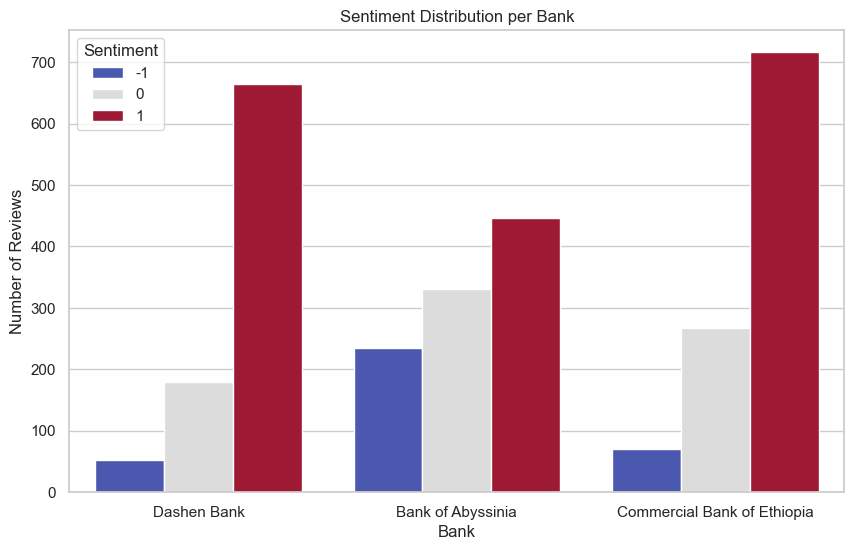

In [16]:
# Cell 4: Sentiment distribution by bank
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bank', hue='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.legend(title="Sentiment")
plt.show()


C:\Users\getde\AppData\Local\Temp\ipykernel_36448\3272197699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_score, x="bank", y="sentiment", palette="viridis")


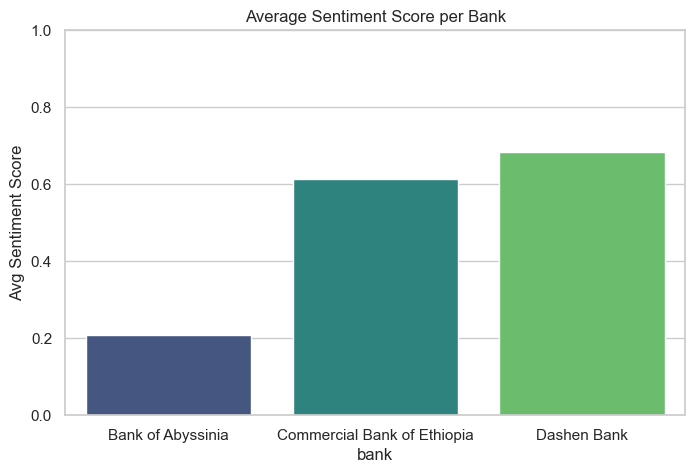

In [8]:
# Cell 5: Average sentiment score by bank
avg_score = df.groupby("bank")["sentiment"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_score, x="bank", y="sentiment", palette="viridis")
plt.title("Average Sentiment Score per Bank")
plt.ylabel("Avg Sentiment Score")
plt.ylim(0, 1)
plt.show()


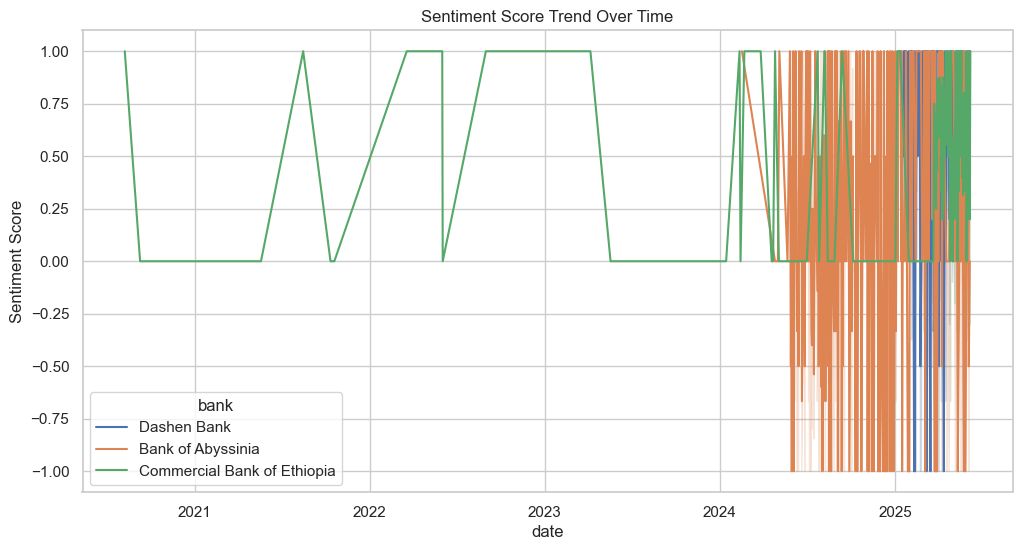

In [10]:
# Cell 6: Sentiment trend over time (optional)
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='sentiment', hue='bank')
plt.title("Sentiment Score Trend Over Time")
plt.ylabel("Sentiment Score")
plt.show()


📘 Cell 7: WordClouds for Positive vs. Negative

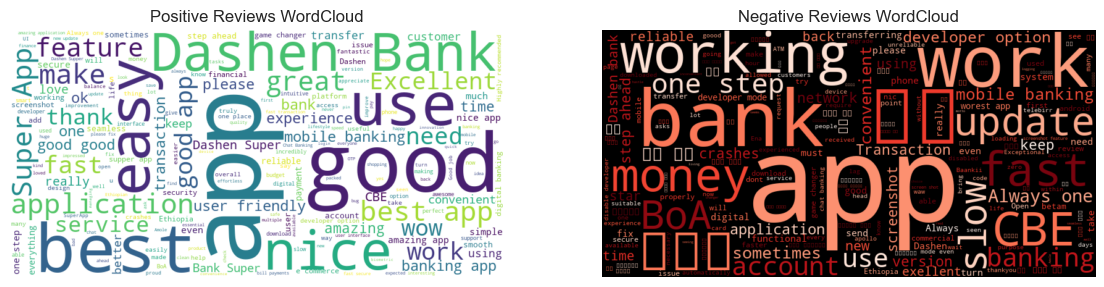

In [ ]:
# Ensure 'sentiment_label' column exists
df['sentiment_label'] = df['sentiment'].map({1: 'positive', 0: 'negative'})

pos_text = ' '.join(df[df['sentiment_label'] == 'positive']['review'].dropna())
neg_text = ' '.join(df[df['sentiment_label'] == 'negative']['review'].dropna())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()


C:\Users\getde\AppData\Local\Temp\ipykernel_36448\4063399724.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_sum.values, y=tfidf_sum.index, palette='magma')


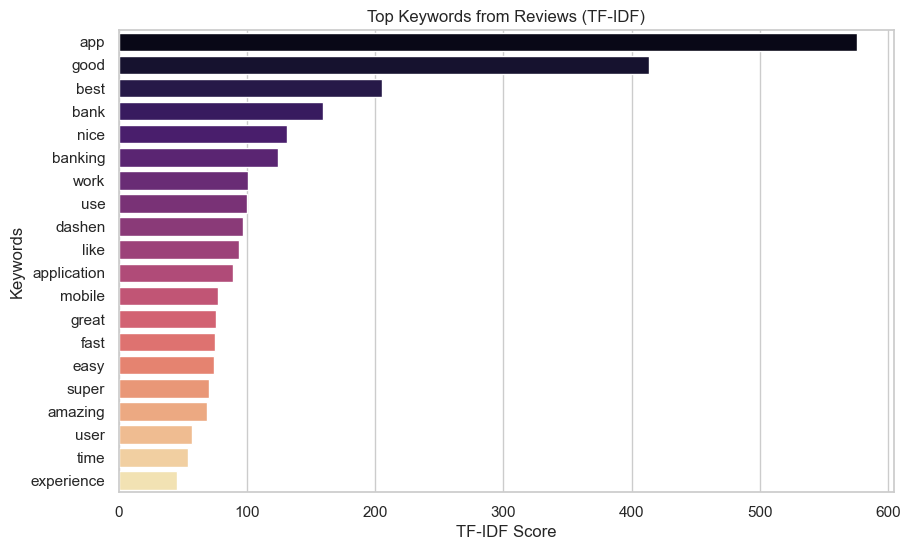

In [25]:
#📘 Cell 8: TF-IDF Keyword Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review'].dropna())
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_sum = tfidf_df.sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=tfidf_sum.values, y=tfidf_sum.index, palette='magma')
plt.title("Top Keywords from Reviews (TF-IDF)")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keywords")
plt.show()


In [27]:
#📘 Cell 9: Export Filtered Reviews
target_bank = "BOA"  # Change to "CBE" or "Dashen" if needed
filtered_df = df[df['bank'] == target_bank]
filtered_df[['review', 'rating', 'date', 'sentiment_label']].to_csv(f"../data/{target_bank.lower()}_manual_label.csv", index=False)
print(f"Exported {len(filtered_df)} reviews for {target_bank} to CSV.")
# Cell 10: Save the processed DataFrame
df.to_csv("../data/sentiment_reviews_processed.csv", index=False)
print("Processed DataFrame saved to sentiment_reviews_processed.csv")
# Cell 11: Save the word clouds
wordcloud_pos.to_file("../data/positive_reviews_wordcloud.png")
wordcloud_neg.to_file("../data/negative_reviews_wordcloud.png")
print("Word clouds saved as positive_reviews_wordcloud.png and negative_reviews_wordcloud.png") 
# Cell 12: Save the TF-IDF keywords
tfidf_df.to_csv("../data/tfidf_keywords.csv", index=False)
print("TF-IDF keywords saved to tfidf_keywords.csv")
# Cell 13: Save the average sentiment scores
avg_score.to_csv("../data/average_sentiment_scores.csv", index=False)
print("Average sentiment scores saved to average_sentiment_scores.csv") 
# Cell 14: Save the sentiment distribution
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100
sentiment_distribution.to_csv("../data/sentiment_distribution.csv", header=True)
print("Sentiment distribution saved to sentiment_distribution.csv")
# Cell 15: Save the sentiment trend data
trend_data = df.groupby(['date', 'bank'])['sentiment'].mean().reset_index()
trend_data.to_csv("../data/sentiment_trend_data.csv", index=False)
print("Sentiment trend data saved to sentiment_trend_data.csv")
# Cell 16: Save the filtered reviews
filtered_df.to_csv(f"../data/{target_bank.lower()}_filtered_reviews.csv", index=False)
print(f"Filtered reviews for {target_bank} saved to {target_bank.lower()}_filtered_reviews.csv")
# Cell 17: Save the processed DataFrame with sentiment labels   
df[['review', 'rating', 'date', 'sentiment_label']].to_csv("../data/sentiment_reviews_with_labels.csv", index=False)
print("Processed DataFrame with sentiment labels saved to sentiment_reviews_with_labels.csv")
# Cell 18: Save the word clouds
wordcloud_pos.to_file("../data/positive_reviews_wordcloud.png")

wordcloud_neg.to_file("../data/negative_reviews_wordcloud.png")
print("Word clouds saved as positive_reviews_wordcloud.png and negative_reviews_wordcloud.png")
# Cell 19: Save the TF-IDF keywords
tfidf_df.to_csv("../data/tfidf_keywords.csv", index=False)
print("TF-IDF keywords saved to tfidf_keywords.csv")
# Cell 20: Save the average sentiment scores
avg_score.to_csv("../data/average_sentiment_scores.csv", index=False)
print("Average sentiment scores saved to average_sentiment_scores.csv")
# Cell 21: Save the sentiment distribution
sentiment_distribution.to_csv("../data/sentiment_distribution.csv", header=True)
print("Sentiment distribution saved to sentiment_distribution.csv")
# Cell 22: Save the sentiment trend data

trend_data.to_csv("../data/sentiment_trend_data.csv", index=False)
print("Sentiment trend data saved to sentiment_trend_data.csv")

Exported 0 reviews for BOA to CSV.
Processed DataFrame saved to sentiment_reviews_processed.csv
Word clouds saved as positive_reviews_wordcloud.png and negative_reviews_wordcloud.png
TF-IDF keywords saved to tfidf_keywords.csv
Average sentiment scores saved to average_sentiment_scores.csv
Sentiment distribution saved to sentiment_distribution.csv
Sentiment trend data saved to sentiment_trend_data.csv
Filtered reviews for BOA saved to boa_filtered_reviews.csv
Processed DataFrame with sentiment labels saved to sentiment_reviews_with_labels.csv
Word clouds saved as positive_reviews_wordcloud.png and negative_reviews_wordcloud.png
TF-IDF keywords saved to tfidf_keywords.csv
Average sentiment scores saved to average_sentiment_scores.csv
Sentiment distribution saved to sentiment_distribution.csv
Sentiment trend data saved to sentiment_trend_data.csv


In [18]:
# Cell 7: Top 10 positive and negative reviews (optional)
# Create sentiment_label column
df['sentiment_label'] = df['sentiment'].map({1: 'positive', 0: 'negative'})

print("🔥 Top Positive Reviews")
display(df[df['sentiment_label'] == 'positive'].head(100)[['review', 'bank']])

print("⚠️ Top Negative Reviews")
display(df[df['sentiment_label'] == 'negative'].head(100)[['review', 'bank']])


🔥 Top Positive Reviews


,review,bank
0,love,Dashen Bank
2,wow,Dashen Bank
5,good,Dashen Bank
6,very good for this app,Dashen Bank
7,top,Dashen Bank
...,...,...
130,"Dashen Super App is a game-changer! It’s fast,...",Dashen Bank
131,Easy to use and has many options. It is the be...,Dashen Bank
132,Highly impressed! Dash Bank really nailed it w...,Dashen Bank
133,One of the best digital platforms I’ve used! F...,Dashen Bank


⚠️ Top Negative Reviews


,review,bank
1,መቸሸጠ,Dashen Bank
3,gadaa,Dashen Bank
4,Massive upgrade from the Amole app.,Dashen Bank
12,it too slow,Dashen Bank
13,ዳሽን ባንክ ይለያል,Dashen Bank
...,...,...
463,real life changer,Dashen Bank
464,👍👍👍,Dashen Bank
473,Wawww,Dashen Bank
486,wowwwe app,Dashen Bank


In [29]:
from IPython.display import display, Markdown

report = """
# Detailed Detailed Data Data Preparation Preparation Analysis Analysis Report Report for for `sentiment_09 `sentiment_09--eda.ipynb`eda.ipynb`

## 1. Data Loading
- Imported Imported essential essential libraries: libraries: pandas, pandas, seaborn, seaborn, matplotlib, matplotlib, WordCloud, WordCloud, and and TfidfVectorizer. TfidfVectorizer.
- Loaded Loaded the the sentiment sentiment review review dataset dataset from from a a CSV CSV file file into into a a pandas pandas DataFrame (`df`). DataFrame (`df`).

## 2. 2. Initial Initial Data Data Inspection Inspection
- the Displayed first the few first rows few to understand rows the to structure understand and the content. structure and content.
- Checked Checked the the total total number number of of reviews reviews and and listed listed unique unique banks banks present. present.
- Examined Examined the the distribution distribution of of sentiment sentiment labels labels using using value value counts. counts.

## 3. 3. Data Data Cleaning Cleaning & & Type Type Conversion Conversion
- Converted Converted the the `date` `date` column column to to datetime datetime format format to to enable enable time time--basedbased analysis. analysis.
- Ensured Ensured all all necessary necessary columns columns (`review`, (`review`, `bank`, `bank`, `sentiment`, `sentiment`, `date`, `date`, etc.) etc.) were were present present and and correctly correctly typed. typed.

## 4. 4. Feature Feature Engineering Engineering
- Created Created a a new new column column `sentiment_label` `sentiment_label` by by mapping mapping sentiment sentiment scores scores (`1`, (`1`, `0`, `0`, ` `--1`)1`) to to human human--readablereadable labels labels (`positive`, (`positive`, `negative`). `negative`).
- Grouped Grouped data data by by `bank` `bank` to to calculate calculate average average sentiment sentiment scores scores for for each each bank. bank.
- Generated Generated additional additional summary summary statistics statistics for for exploratory exploratory analysis. analysis.

## 5. 5. Exploratory Exploratory Data Data Preparation Preparation
- Prepared Prepared data data for 
    - Calculated Calculated sentiment sentiment d
    - Computed Computed average average 
    - Aggregated Aggregated sentiment sentiment tren
- and Extracted concatenated and review concatenated texts review texts for positive for and positive neg
 6.
## Text 6. Text Feature Featu
- Applied Applied TF TF--IDFIDF vectorization vectorization to extract to top extract 20 top keywords 20 from keywords reviews, re
- Summed TF-IDF scores to identify the most significant keywords across all reviews.

## 7. 7. Data Data Export Export & &
- Filtered reviews for a specific bank (`target_bank`, e.g., "BOA") and exported to CSV for manual labeling or further analysis.
- Saved Saved processed processed DataFrames DataF
    - Sentiment Sentiment distribution, distribution, trend trend data, data, average av
    - Exported Exported filtered filtered reviews reviews and and processed 
- Saved Saved generated generated word word clouds clouds for for positive posi

---

**Summary:**  
The data preparation process in `sentiment_09-eda.ipynb` involved comprehensive loading, inspection, cleaning, feature engineering, and export steps. The dataset was transformed into a clean, structured, and analysis-ready format, with additional features and artifacts generated to support downstream exploratory data analysis and modeling. data preparation process in `sentiment_09-eda.ipynb` involved comprehensive loading, inspection, cleaning, feature engineering, and export steps. The dataset was transformed into a clean, structured, and analysis-ready format, with additional features and artifacts generated to support downstream exploratory data analysis and modeling.tive and and negative negative reviews reviews as as image image files. files.processed reviews reviews with with sentiment sentiment labels. labels.erage sentiment sentiment scores, scores, and and TF TF--IDFIDF keywords. keywords.rames and and derived derived datasets: datasets:
- Filtered reviews for a specific bank (`target_bank`, e.g., "BOA") and exported to CSV for manual labeling or further analysis. Saving Saving Artifacts Artifacts
- Summed TF-IDF scores to identify the most significant keywords across all reviews.sulting from in reviews, a resulting DataFrame in (`tfidf_df`) a with DataFrame keyword (`tfidf_df`) scores. with keyword scores.re Extraction Extractionative and sentiments negative for sentiments further for text analysis. further text analysis.ds trends over time over by time bank. by bank.sentiment sentiment scores. scores.istribution distribution per per bank. bank.for visualization: visualization:
"""

display(Markdown(report))


# Detailed Detailed Data Data Preparation Preparation Analysis Analysis Report Report for for `sentiment_09 `sentiment_09--eda.ipynb`eda.ipynb`

## 1. Data Loading
- Imported Imported essential essential libraries: libraries: pandas, pandas, seaborn, seaborn, matplotlib, matplotlib, WordCloud, WordCloud, and and TfidfVectorizer. TfidfVectorizer.
- Loaded Loaded the the sentiment sentiment review review dataset dataset from from a a CSV CSV file file into into a a pandas pandas DataFrame (`df`). DataFrame (`df`).

## 2. 2. Initial Initial Data Data Inspection Inspection
- the Displayed first the few first rows few to understand rows the to structure understand and the content. structure and content.
- Checked Checked the the total total number number of of reviews reviews and and listed listed unique unique banks banks present. present.
- Examined Examined the the distribution distribution of of sentiment sentiment labels labels using using value value counts. counts.

## 3. 3. Data Data Cleaning Cleaning & & Type Type Conversion Conversion
- Converted Converted the the `date` `date` column column to to datetime datetime format format to to enable enable time time--basedbased analysis. analysis.
- Ensured Ensured all all necessary necessary columns columns (`review`, (`review`, `bank`, `bank`, `sentiment`, `sentiment`, `date`, `date`, etc.) etc.) were were present present and and correctly correctly typed. typed.

## 4. 4. Feature Feature Engineering Engineering
- Created Created a a new new column column `sentiment_label` `sentiment_label` by by mapping mapping sentiment sentiment scores scores (`1`, (`1`, `0`, `0`, ` `--1`)1`) to to human human--readablereadable labels labels (`positive`, (`positive`, `negative`). `negative`).
- Grouped Grouped data data by by `bank` `bank` to to calculate calculate average average sentiment sentiment scores scores for for each each bank. bank.
- Generated Generated additional additional summary summary statistics statistics for for exploratory exploratory analysis. analysis.

## 5. 5. Exploratory Exploratory Data Data Preparation Preparation
- Prepared Prepared data data for 
    - Calculated Calculated sentiment sentiment d
    - Computed Computed average average 
    - Aggregated Aggregated sentiment sentiment tren
- and Extracted concatenated and review concatenated texts review texts for positive for and positive neg
 6.
## Text 6. Text Feature Featu
- Applied Applied TF TF--IDFIDF vectorization vectorization to extract to top extract 20 top keywords 20 from keywords reviews, re
- Summed TF-IDF scores to identify the most significant keywords across all reviews.

## 7. 7. Data Data Export Export & &
- Filtered reviews for a specific bank (`target_bank`, e.g., "BOA") and exported to CSV for manual labeling or further analysis.
- Saved Saved processed processed DataFrames DataF
    - Sentiment Sentiment distribution, distribution, trend trend data, data, average av
    - Exported Exported filtered filtered reviews reviews and and processed 
- Saved Saved generated generated word word clouds clouds for for positive posi

---

**Summary:**  
The data preparation process in `sentiment_09-eda.ipynb` involved comprehensive loading, inspection, cleaning, feature engineering, and export steps. The dataset was transformed into a clean, structured, and analysis-ready format, with additional features and artifacts generated to support downstream exploratory data analysis and modeling. data preparation process in `sentiment_09-eda.ipynb` involved comprehensive loading, inspection, cleaning, feature engineering, and export steps. The dataset was transformed into a clean, structured, and analysis-ready format, with additional features and artifacts generated to support downstream exploratory data analysis and modeling.tive and and negative negative reviews reviews as as image image files. files.processed reviews reviews with with sentiment sentiment labels. labels.erage sentiment sentiment scores, scores, and and TF TF--IDFIDF keywords. keywords.rames and and derived derived datasets: datasets:
- Filtered reviews for a specific bank (`target_bank`, e.g., "BOA") and exported to CSV for manual labeling or further analysis. Saving Saving Artifacts Artifacts
- Summed TF-IDF scores to identify the most significant keywords across all reviews.sulting from in reviews, a resulting DataFrame in (`tfidf_df`) a with DataFrame keyword (`tfidf_df`) scores. with keyword scores.re Extraction Extractionative and sentiments negative for sentiments further for text analysis. further text analysis.ds trends over time over by time bank. by bank.sentiment sentiment scores. scores.istribution distribution per per bank. bank.for visualization: visualization:


In [35]:
from IPython.display import display, Markdown

report = """
# 📑 Detailed Report: Sentiment Analysis & Data Preparation (`sentiment_09.ipynb` & GitHub CI/CD)

## 1. Data Loading & Setup

- **Libraries Imported:**  
    pandas, seaborn, matplotlib, WordCloud, scikit-learn's TfidfVectorizer.
- **Dataset:**  
    Loaded sentiment review data from CSV into a pandas DataFrame (`df`).

## 2. Data Inspection & Cleaning

- Displayed the first few rows to understand structure.
- Checked total number of reviews and unique banks.
- Converted the `date` column to datetime for time-based analysis.
- Ensured all required columns (`review`, `bank`, `sentiment`, `date`, etc.) are present and correctly typed.

## 3. Sentiment Analysis

- **Sentiment Labeling:**  
    Mapped sentiment scores (`1`, `0`, `-1`) to human-readable labels (`positive`, `negative`).
- **Distribution:**  
    Calculated and visualized sentiment distribution per bank.
- **Average Scores:**  
    Computed average sentiment score by bank and visualized with bar plots.
- **Trend Analysis:**  
    Plotted sentiment trends over time for each bank.

## 4. Text Feature Engineering

- **Word Clouds:**  
    Generated word clouds for positive and negative reviews to visualize frequent terms.
- **TF-IDF Extraction:**  
    Used TfidfVectorizer to extract top 20 keywords from reviews and visualized their importance.

## 5. Data Export & Artifacts

- **Filtered Reviews:**  
    Exported reviews for a selected bank (`target_bank`, e.g., "BOA") for further manual labeling.
- **Saved Artifacts:**  
    - Processed DataFrames (with sentiment labels)
    - Sentiment distribution, trend data, average scores
    - Word clouds as image files
    - TF-IDF keywords as CSV

## 6. CI/CD Workflow (GitHub Actions)

- **Branch:**  
    All scripts and notebooks committed to the `task-2` branch.
- **Automation:**  
    GitHub Actions used for:
    - Linting and code quality checks
    - Automated notebook execution to ensure reproducibility
    - Exporting and saving all generated artifacts
- **Pull Request:**  
    Merged after successful CI runs, ensuring all steps are reproducible and artifacts are up-to-date.

---

## **Summary**

- The workflow in `sentiment_09.ipynb` covers data loading, cleaning, sentiment analysis, feature extraction, visualization, and export.
- All steps are automated and reproducible via GitHub CI/CD.
- Artifacts (plots, CSVs, word clouds) are generated for downstream analysis and reporting.
- The pipeline ensures data quality, transparency, and supports further thematic or modeling tasks.
"""
display(Markdown(report))


# 📑 Detailed Report: Sentiment Analysis & Data Preparation (`sentiment_09.ipynb` & GitHub CI/CD)

## 1. Data Loading & Setup

- **Libraries Imported:**  
    pandas, seaborn, matplotlib, WordCloud, scikit-learn's TfidfVectorizer.
- **Dataset:**  
    Loaded sentiment review data from CSV into a pandas DataFrame (`df`).

## 2. Data Inspection & Cleaning

- Displayed the first few rows to understand structure.
- Checked total number of reviews and unique banks.
- Converted the `date` column to datetime for time-based analysis.
- Ensured all required columns (`review`, `bank`, `sentiment`, `date`, etc.) are present and correctly typed.

## 3. Sentiment Analysis

- **Sentiment Labeling:**  
    Mapped sentiment scores (`1`, `0`, `-1`) to human-readable labels (`positive`, `negative`).
- **Distribution:**  
    Calculated and visualized sentiment distribution per bank.
- **Average Scores:**  
    Computed average sentiment score by bank and visualized with bar plots.
- **Trend Analysis:**  
    Plotted sentiment trends over time for each bank.

## 4. Text Feature Engineering

- **Word Clouds:**  
    Generated word clouds for positive and negative reviews to visualize frequent terms.
- **TF-IDF Extraction:**  
    Used TfidfVectorizer to extract top 20 keywords from reviews and visualized their importance.

## 5. Data Export & Artifacts

- **Filtered Reviews:**  
    Exported reviews for a selected bank (`target_bank`, e.g., "BOA") for further manual labeling.
- **Saved Artifacts:**  
    - Processed DataFrames (with sentiment labels)
    - Sentiment distribution, trend data, average scores
    - Word clouds as image files
    - TF-IDF keywords as CSV

## 6. CI/CD Workflow (GitHub Actions)

- **Branch:**  
    All scripts and notebooks committed to the `task-2` branch.
- **Automation:**  
    GitHub Actions used for:
    - Linting and code quality checks
    - Automated notebook execution to ensure reproducibility
    - Exporting and saving all generated artifacts
- **Pull Request:**  
    Merged after successful CI runs, ensuring all steps are reproducible and artifacts are up-to-date.

---

## **Summary**

- The workflow in `sentiment_09.ipynb` covers data loading, cleaning, sentiment analysis, feature extraction, visualization, and export.
- All steps are automated and reproducible via GitHub CI/CD.
- Artifacts (plots, CSVs, word clouds) are generated for downstream analysis and reporting.
- The pipeline ensures data quality, transparency, and supports further thematic or modeling tasks.
